In [1]:
from ripser import ripser
from persim import plot_diagrams
import numpy as np
from numpy import pi,cos,sin
import matplotlib.pyplot as plt
import random

In [2]:
def get_pixels(num_pixels, window_size):
    sample = list(np.linspace(-window_size/2, window_size/2, num_pixels))
    pixels = []
    for i in range(len(sample)):
        for j in range(len(sample)):
            pixels.append((sample[i],sample[j]))     
    return pixels


def get_colors(pixels, image_function):
    colors = []
    for pixel in pixels:
        colors.append(image_function(pixel[0],pixel[1]))
    return colors  

def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

def generate_isom(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(2 * pi * np.random.random(n_isos)) # sampling from (0, 2pi)

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv

def new_colors(pixels, iso_inv, image_function):
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    new_colors = get_colors(pixels_inv, image_function)
    return new_colors

def matrix_of_images(pixels, isos_inv, image_function):
    vectors = []
    for i in isos_inv:
        vectors.append([new_colors(pixels, i, image_function)])
    M = np.concatenate(vectors, axis=0 )
    return M

def p_hom(M, maxdim, coeff):
    output = ripser(M, maxdim = maxdim, coeff = coeff)
    return output
    
def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    d
    return d

def plot_dgms(output):
    dgms = output['dgms']
    fig = plt.figure(figsize = (12, 6))
    plot_diagrams(dgms)
    
def pipeline(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

def graph(image_function, x, y, x_random = True, n_samples= 100000, y_random = True):
    
    if x_random == True:
        X = list(2 * x * np.random.random(n_samples) - x) 
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)      

    if x_random == False:
        X = np.linspace(-x,x,n_samples)
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)   

    points = []
    for i in range(n_samples):
        color = image_function(X[i],Y[i])
        if color == 1:
            points.append((X[i],Y[i])) 
        
    x_points = []
    y_points = []
    for i in points: 
        x_points.append(i[0])
        y_points.append(i[1])
        
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points)
    plt.show()
    
def view_window(image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)

    points = []
    for pixel in pixels:
        color = image_function(pixel[0],pixel[1])
        if color == 1:
            points.append(pixel)
    
    x_points = []
    y_points = []
    for pixel in points:
        x_points.append(pixel[0])
        y_points.append(pixel[1])
    
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points)
    plt.show()

In [3]:
def sincos(x,y):
    return sin(2 * x + y) * cos(y)

In [29]:
def graph_continuous(image_function, x, y, x_random = True, n_samples= 100000, y_random = True):
    
    if x_random == True:
        X = list(2 * x * np.random.random(n_samples) - x) 
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)      

    if x_random == False:
        X = np.linspace(-x,x,n_samples)
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)   

    x_points = []
    y_points = []
    colors = []
    for i in range(n_samples):
        color = image_function(X[i],Y[i]) 
        colors.append(color)
        x_points.append(X[i])
        y_points.append(Y[i])

        
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()
    
    
def view_window_continuous(image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)
            
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels)):
        color = image_function(pixels[i][0],pixels[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])
    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()

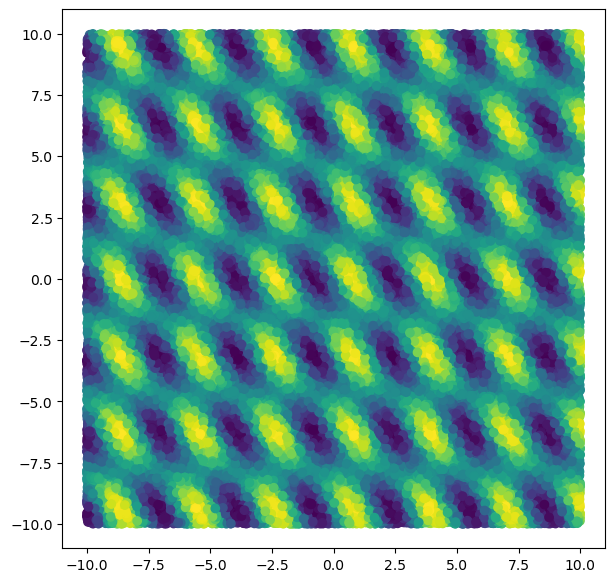

In [30]:
graph_continuous(sincos, 10, 10, x_random = True, n_samples= 100000, y_random = True)

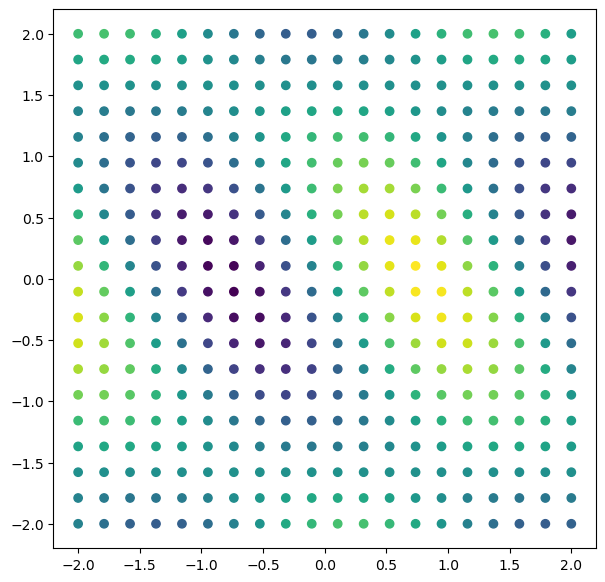

In [31]:
view_window_continuous(sincos, 20, 4)

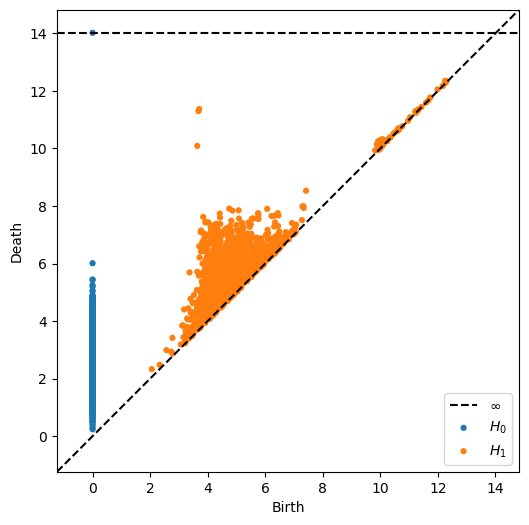

In [6]:
output = pipeline(image_function = sincos, num_pixels = 20 , window_size = 4, n_isos = 2000, x_translate= 10 , y_translate=10, maxdim=1, coeff=2)
plot_dgms(output)

In [8]:
persistent_H1_intervals(output)

[7.665056467056274,
 7.614820957183838,
 6.448309898376465,
 3.7734153270721436,
 3.5135107040405273,
 3.5028040409088135,
 3.3973755836486816,
 3.374802827835083,
 3.3366103172302246,
 3.3179869651794434,
 3.200984477996826,
 3.183262348175049,
 3.168032646179199,
 3.160816192626953,
 3.134774684906006,
 3.126891613006592,
 3.092534065246582,
 3.0773472785949707,
 3.0573625564575195,
 3.052198648452759,
 3.028075695037842,
 3.0123794078826904,
 2.9767508506774902,
 2.952922821044922,
 2.9470198154449463,
 2.935737133026123,
 2.9262232780456543,
 2.8947911262512207,
 2.8870909214019775,
 2.879796028137207,
 2.8758373260498047,
 2.856579542160034,
 2.8548240661621094,
 2.842228889465332,
 2.835330009460449,
 2.8092379570007324,
 2.781041145324707,
 2.7715916633605957,
 2.757929801940918,
 2.7463483810424805,
 2.721757411956787,
 2.7107901573181152,
 2.6936330795288086,
 2.6933798789978027,
 2.6749820709228516,
 2.6700263023376465,
 2.663483142852783,
 2.648691177368164,
 2.6483390331268

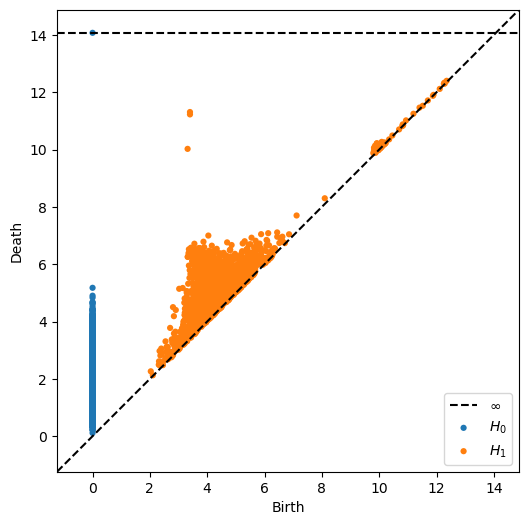

In [9]:
output = pipeline(image_function = sincos, num_pixels = 20 , window_size = 4, n_isos = 3000, x_translate= 10 , y_translate=10, maxdim=1, coeff=2)
plot_dgms(output)

In [10]:
persistent_H1_intervals(output)

[7.9095258712768555,
 7.826118469238281,
 6.70713996887207,
 3.1625125408172607,
 3.159966230392456,
 3.144031047821045,
 3.0639264583587646,
 3.0373048782348633,
 3.0181570053100586,
 2.9595208168029785,
 2.9574403762817383,
 2.939638376235962,
 2.9334464073181152,
 2.9309794902801514,
 2.9238297939300537,
 2.9155056476593018,
 2.9038968086242676,
 2.8806493282318115,
 2.8567378520965576,
 2.8381905555725098,
 2.8243093490600586,
 2.8231661319732666,
 2.8071086406707764,
 2.803043842315674,
 2.752350091934204,
 2.7479162216186523,
 2.719813346862793,
 2.713613510131836,
 2.700871467590332,
 2.699962615966797,
 2.6981849670410156,
 2.6892740726470947,
 2.639749765396118,
 2.627701997756958,
 2.623638391494751,
 2.622533082962036,
 2.6221344470977783,
 2.6134824752807617,
 2.612931728363037,
 2.6092405319213867,
 2.594331741333008,
 2.5907137393951416,
 2.5767693519592285,
 2.5715224742889404,
 2.5645461082458496,
 2.5454530715942383,
 2.5374374389648438,
 2.535886764526367,
 2.53525257

**There seems to be 3 classes in $H_1$ over $\mathbb{Z}_2$** 

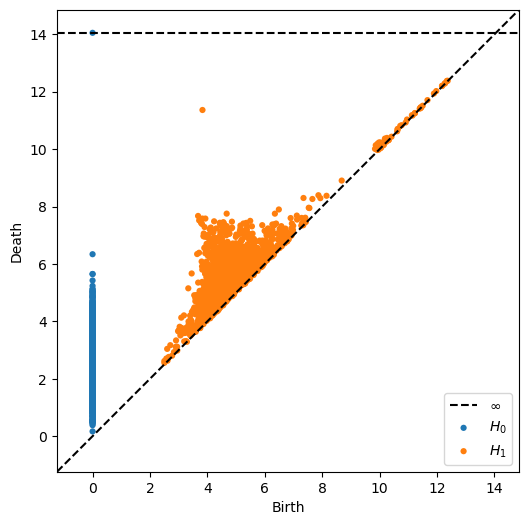

In [27]:
output = pipeline(image_function = sincos, num_pixels = 20 , window_size = 4, n_isos = 2000, x_translate= 10 , y_translate=10, maxdim=1, coeff=3)
plot_dgms(output)

**There seems to be 1 class in $H_1$ over $\mathbb{Z}_3$** 

Looking into cocyles....

In [35]:
def p_hom_cocyles(M, maxdim, coeff):
    output = ripser(M, maxdim = maxdim, coeff = coeff, do_cocycles = True)
    return output
def pipeline_cocyles(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom_cocyles(M, maxdim, coeff)
    return output
output = pipeline_cocyles(image_function = sincos, num_pixels = 20 , window_size = 4, n_isos = 3000, x_translate= 10 , y_translate=10, maxdim=1, coeff=2)


In [44]:
len(output['cocycles'][1])

1902

In [45]:
len(output['dgms'][1])

1902

every element in the persistent diagram has a corresponding element in the cocyles 

In [46]:
def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    d
    return d

In [64]:
def persist_cocycles(output):
    H1 = list(output['dgms'][1])
    cocyles = list(output['cocycles'][1])
    
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0])
        
    dictionary = {}
    for i in range(len(H1)):
        dictionary[d[i]] = cocyles[i]
        
    myKeys = list(dictionary.keys())
    myKeys.sort(reverse=True)
    sorted_dict = {i: dictionary[i] for i in myKeys}
    
    return sorted_dict
    

In [66]:
cocycle = persist_cocycles(output)
# dictionary that contains length of barcode and array of elements that create the cycle in H1
# seems like somehow each "vertex" has been assigned an index
# so vector [i,j,1] in the array indicates that the 1-simplex spanned by vertices (i,j) appears in the cycle (once?)

In [67]:
cocycle

{8.000941514968872: array([[1428,  176,    1],
        [2088, 2014,    1],
        [2045,   29,    1],
        ...,
        [1877, 1786,    1],
        [2896, 2405,    1],
        [2949, 1115,    1]]),
 7.881901979446411: array([[2609, 2434,    1],
        [2609, 1821,    1],
        [2992, 1652,    1],
        ...,
        [2409,  761,    1],
        [2174, 1080,    1],
        [1084,  729,    1]]),
 6.594622850418091: array([[1372, 1174,    1],
        [ 679,  134,    1],
        [2587,  162,    1],
        ...,
        [1780, 1639,    1],
        [2227,  889,    1],
        [2077,  152,    1]]),
 3.298926830291748: array([[2794,  412,    1],
        [2794,  598,    1],
        [ 598,  539,    1],
        [ 920,  598,    1],
        [ 539,  412,    1],
        [2794, 1723,    1],
        [2794, 2276,    1],
        [2397,  598,    1],
        [1008,  598,    1],
        [1441,  598,    1],
        [1441,  412,    1]]),
 3.1424646377563477: array([[2368, 1285,    1],
        [2335, 17

In [69]:
cocycle[list(cocycle.keys())[0]]

array([[1428,  176,    1],
       [2088, 2014,    1],
       [2045,   29,    1],
       ...,
       [1877, 1786,    1],
       [2896, 2405,    1],
       [2949, 1115,    1]])

In [71]:
for i in cocycle[list(cocycle.keys())[0]]:
    print(i)

[1428  176    1]
[2088 2014    1]
[2045   29    1]
[1496  803    1]
[849 159   1]
[2370 2229    1]
[2643 2580    1]
[2640  440    1]
[2951  982    1]
[2963 1734    1]
[2122  131    1]
[2963 2623    1]
[2870 1428    1]
[1240  440    1]
[2753 1566    1]
[2111   74    1]
[2551 2538    1]
[1325  877    1]
[877 564   1]
[2368 1285    1]
[2619 1081    1]
[2088  537    1]
[1869 1428    1]
[1496 1112    1]
[440 398   1]
[2773 1189    1]
[2770  976    1]
[2471 2117    1]
[1757  136    1]
[1505  440    1]
[2335 1751    1]
[2538  569    1]
[2102  391    1]
[2405 1707    1]
[1969 1487    1]
[1194  450    1]
[2088 1869    1]
[1566 1112    1]
[1555 1430    1]
[2745  607    1]
[1839 1121    1]
[2111  242    1]
[1732  479    1]
[2287  521    1]
[1364  945    1]
[1625  398    1]
[2425  849    1]
[2477 1001    1]
[2556 1112    1]
[2623 1732    1]
[869 254   1]
[958 607   1]
[2951  829    1]
[1801 1428    1]
[2264 1399    1]
[2425  356    1]
[2679 1748    1]
[569 196   1]
[2732 2368    1]
[1413  588    1

[802  38   1]
[735 649   1]
[2057 1869    1]
[2440  159    1]
[2949 2684    1]
[1197  220    1]
[697 678   1]
[2638  460    1]
[2549 2320    1]
[740 678   1]
[2232 1761    1]
[1639  997    1]
[1700  649    1]
[1240  377    1]
[2111 2099    1]
[662 586   1]
[2229  114    1]
[2551   77    1]
[2006 1504    1]
[2564 2305    1]
[936 290   1]
[811 503   1]
[2183  393    1]
[2861 1019    1]
[1360  983    1]
[1773 1761    1]
[446 199   1]
[2223  611    1]
[2003  600    1]
[2601 2205    1]
[1084  575    1]
[2308  649    1]
[648  84   1]
[562 513   1]
[2238 1389    1]
[1427  110    1]
[2688 1152    1]
[2183 1582    1]
[1568 1252    1]
[2668  697    1]
[2887 1962    1]
[1545 1196    1]
[2584 2314    1]
[1454 1223    1]
[2601 2501    1]
[1496  934    1]
[2546 1174    1]
[1530  303    1]
[2186 1639    1]
[2717  962    1]
[2007 1406    1]
[1861  468    1]
[2642 2242    1]
[2867 2207    1]
[2484 1374    1]
[2755 1074    1]
[2146 1877    1]
[2257 2057    1]
[1687 1633    1]
[2223  801    1]
[2950   51

[2181 1949    1]
[2474 1671    1]
[1514 1470    1]
[2993 1748    1]
[1997 1126    1]
[2227 1881    1]
[1605  244    1]
[1816  564    1]
[2314  286    1]
[2425 2143    1]
[2227 1811    1]
[2206  716    1]
[1669  391    1]
[2755 2549    1]
[2828 2789    1]
[2549 1000    1]
[1715 1499    1]
[2618 2519    1]
[2628 1636    1]
[2232 1123    1]
[2631 2596    1]
[2747 1245    1]
[2324 1902    1]
[2207 1027    1]
[2959 2186    1]
[2623 2471    1]
[1767  479    1]
[2296 1488    1]
[821 428   1]
[2176 2121    1]
[1602   51    1]
[2564 2368    1]
[2752 1796    1]
[1570  655    1]
[1248 1111    1]
[1971 1861    1]
[2181 1912    1]
[2461 2273    1]
[2745 1401    1]
[2870 1811    1]
[1356  440    1]
[2976 1367    1]
[2207 1827    1]
[320  34   1]
[1551  977    1]
[2333  608    1]
[2642   77    1]
[2343 1177    1]
[2743  177    1]
[2230  951    1]
[2679  426    1]
[1983 1796    1]
[1226 1103    1]
[1772 1251    1]
[1337   14    1]
[2582  481    1]
[2985  513    1]
[1426 1223    1]
[1337  404    1]
[28

[2372 1428    1]
[1967  444    1]
[2668  601    1]
[2016 1143    1]
[2151  183    1]
[2760 2601    1]
[817 272   1]
[2397 2349    1]
[2586  242    1]
[2773 2246    1]
[1980 1894    1]
[2788 1717    1]
[1749 1530    1]
[1499  945    1]
[1763 1000    1]
[2349  901    1]
[1434  376    1]
[680 136   1]
[1957 1571    1]
[1233  584    1]
[1596 1410    1]
[977 103   1]
[2121  252    1]
[621 242   1]
[1884   92    1]
[2171 1967    1]
[2628  646    1]
[2672 1001    1]
[1233  434    1]
[1045   77    1]
[1019  437    1]
[2954 2382    1]
[1776 1514    1]
[2827 2785    1]
[917 426   1]
[2603 2523    1]
[958  83   1]
[2993 1466    1]
[1426  186    1]
[2239 1870    1]
[2658 1964    1]
[1877 1430    1]
[2522  877    1]
[1657  564    1]
[2181  806    1]
[1084  325    1]
[2902 2102    1]
[2548 1500    1]
[1851 1258    1]
[1443  131    1]
[2006 1626    1]
[1663 1153    1]
[1948  276    1]
[2640  192    1]
[2828 1602    1]
[2911    3    1]
[1825  175    1]
[2122 2075    1]
[2242 1380    1]
[626   6   1]
[